In [1]:
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib.colors import ListedColormap

In [7]:
import numpy as np

In [8]:
# Load the dataset
column_names = [
    'Status', 'Month', 'CreditHistory', 'Purpose', 'CreditAmount', 
    'SavingsAccount', 'Employment', 'InstallmentRate', 'PersonalStatus', 
    'Debtors', 'ResidenceSince', 'Property', 'Age', 'OtherInstallmentPlans', 
    'Housing', 'ExistingCredits', 'Job', 'NumberLiable', 'Telephone', 'ForeignWorker', 
    'Creditworthy']

In [9]:
df = pd.read_csv('german.data', sep=' ', header=None, names=column_names)

In [10]:
# Preprocess the data
X = df.drop(['Creditworthy'], axis=1)
y = df['Creditworthy']

In [11]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Create a random forest classifier
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [14]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
# Predict the test data
y_prediction = model.predict(X_test)

In [16]:
# Evaluate the model using confusion matrix
conf_mat = confusion_matrix(y_test, y_prediction)
print(conf_mat)

[[123  18]
 [ 33  26]]


In [17]:
X_set, y_set = X_train.iloc[:, :2].values, y_train.values


In [18]:
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1.0))

In [19]:
# Predict over the grid using only the first two features and setting the rest to their mean value
meshgrid_array = np.c_[X1.ravel(), X2.ravel()]
n_samples = meshgrid_array.shape[0]


In [20]:
# Create an array with the same number of columns as the training data
full_meshgrid_array = np.zeros((n_samples, X_train.shape[1]))
full_meshgrid_array[:, :2] = meshgrid_array


In [21]:
# Fill the remaining columns with the mean value of each feature
for i in range(2, X_train.shape[1]):
    full_meshgrid_array[:, i] = X_train.iloc[:, i].mean()


In [22]:
# Make predictions using the model
predictions = model.predict(full_meshgrid_array)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Reshape predictions to match the meshgrid shape
predictions = predictions.reshape(X1.shape)

(249.0, 18424.0)

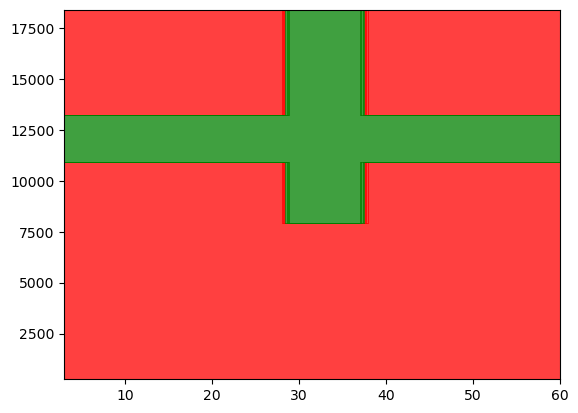

In [24]:
# Plot the contour plot
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

C:\Users\user\AppData\Local\Temp\ipykernel_21000\2099109125.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


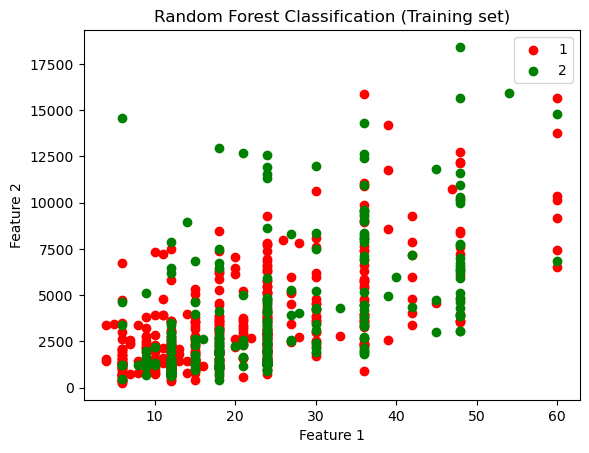

In [25]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [26]:
# Visualize the test result
X_set, y_set = X_test.iloc[:, :2].values, y_test.values
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1.0))

In [27]:
# Predict over the grid using only the first two features and setting the rest to their mean value
meshgrid_array = np.c_[X1.ravel(), X2.ravel()]
n_samples = meshgrid_array.shape[0]

In [28]:
# Create an array with the same number of columns as the test data
full_meshgrid_array = np.zeros((n_samples, X_test.shape[1]))
full_meshgrid_array[:, :2] = meshgrid_array


In [29]:
# Fill the remaining columns with the mean value of each feature
for i in range(2, X_test.shape[1]):
    full_meshgrid_array[:, i] = X_test.iloc[:, i].mean()

In [30]:
# Make predictions using the model
predictions = model.predict(full_meshgrid_array)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
# Reshape predictions to match the meshgrid shape
predictions = predictions.reshape(X1.shape)

(275.0, 14896.0)

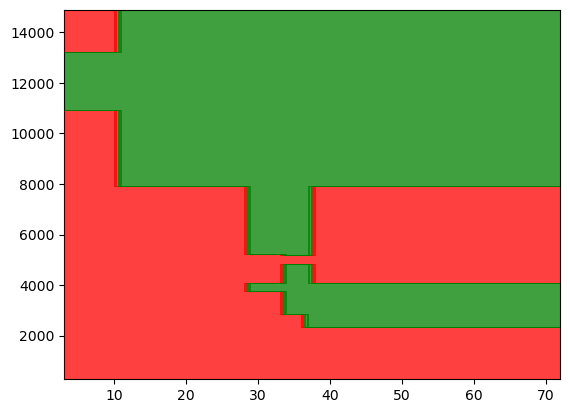

In [32]:
# Plot the contour plot
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

C:\Users\user\AppData\Local\Temp\ipykernel_21000\1279415448.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


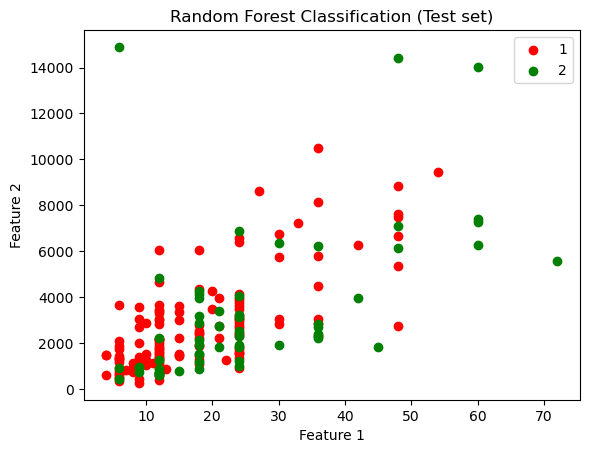

In [33]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show() 